In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.filterwarnings('ignore')

In [2]:
ramen_df = pd.read_csv("top-ramen-ratings.csv")

## Basic Analysis

In [3]:
ramen_df.head()

,Review #,Brand,Variety,Style,Country,Stars,T
0,4120,MIT,Shallot Sauce Dry Noodle,Pack,Taiwan,3,NaN
1,4119,Sapporo Ichiban,Tonkotsu Ramen Japanese Style Noodles,Bowl,United States,4.5,NaN
2,4118,Binh Tay,Mi Kiwi,Bowl,Vietnam,3,NaN
3,4117,Charming Couple,Biang Biang Scallion Chicken Sauce,Pack,Taiwan,4.5,NaN
4,4116,immi,Tom Yum Shrimp Flavor Ramen Soup,Pack,United States,2.75,NaN


In [4]:
ramen_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4120 entries, 0 to 4119
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Review #  4120 non-null   int64  
 1   Brand     4120 non-null   object 
 2   Variety   4120 non-null   object 
 3   Style     4120 non-null   object 
 4   Country   4120 non-null   object 
 5   Stars     4120 non-null   object 
 6   T         0 non-null      float64
dtypes: float64(1), int64(1), object(5)
memory usage: 225.4+ KB


In [5]:
ramen_df.rename(columns={"Review #" : "Review"},inplace=True)
ramen_df.drop(columns="T",inplace=True)
ramen_df.head()

,Review,Brand,Variety,Style,Country,Stars
0,4120,MIT,Shallot Sauce Dry Noodle,Pack,Taiwan,3
1,4119,Sapporo Ichiban,Tonkotsu Ramen Japanese Style Noodles,Bowl,United States,4.5
2,4118,Binh Tay,Mi Kiwi,Bowl,Vietnam,3
3,4117,Charming Couple,Biang Biang Scallion Chicken Sauce,Pack,Taiwan,4.5
4,4116,immi,Tom Yum Shrimp Flavor Ramen Soup,Pack,United States,2.75


In [6]:
ramen_df.isnull().sum()

Review     0
Brand      0
Variety    0
Style      0
Country    0
Stars      0
dtype: int64

In [7]:
ramen_df.columns

Index(['Review', 'Brand', 'Variety', 'Style', 'Country', 'Stars'], dtype='object')

In [8]:
ramen_df["Stars"].unique()

array(['3', '4.5', '2.75', '3.75', '5', '2.5', '4', '2.25', '3.5', '3.25',
       '0.25', '4.75', '0.5', '1', '1.5', '4.25', '1.75', '0', '2',
       '1.25', '0.75', 'NS', 'NR', '3.5/2.5', '4/4', '5/5', '4.5/5',
       '5/2.5', '5/4', '4.25/5', 'Unrated', '3.50', '1.1', '2.1', '0.9',
       '3.1', '4.125', '3.125', '2.125', '2.9', '0.1', '2.8', '3.7',
       '3.4', '3.6', '2.85', '2.3', '3.2', '3.65', '1.8'], dtype=object)

In [9]:
# Convert Stars from object to float.
ramen_df=ramen_df[ramen_df["Stars"].isin(["Unrated","NS","NR","3.5/2.5","4/4","5/5","4.5/5","5/2.5","5/4","4.25/5",""])==False]
print(ramen_df["Stars"].unique())
ramen_df.shape

['3' '4.5' '2.75' '3.75' '5' '2.5' '4' '2.25' '3.5' '3.25' '0.25' '4.75'
 '0.5' '1' '1.5' '4.25' '1.75' '0' '2' '1.25' '0.75' '3.50' '1.1' '2.1'
 '0.9' '3.1' '4.125' '3.125' '2.125' '2.9' '0.1' '2.8' '3.7' '3.4' '3.6'
 '2.85' '2.3' '3.2' '3.65' '1.8']


(4105, 6)

In [10]:
ramen_df["Stars"] = ramen_df["Stars"].astype(float)
ramen_df.dtypes

Review       int64
Brand       object
Variety     object
Style       object
Country     object
Stars      float64
dtype: object

In [11]:
ramen_df.describe()

,Review,Stars
count,4105.000000,4105.000000
mean,2058.325457,3.733410
std,1190.876897,1.043461
min,1.000000,0.000000
25%,1027.000000,3.250000
50%,2054.000000,3.750000
75%,3091.000000,4.500000
max,4120.000000,5.000000


In [12]:
ramen_df.describe(include="object")

,Brand,Variety,Style,Country
count,4105,4105,4105,4105
unique,614,3814,9,53
top,Nissin,Miso Ramen,Pack,Japan
freq,517,11,2255,797


In [13]:
ramen_df["Brand"].value_counts()

Nissin           517
Maruchan         149
Myojo            133
Nongshim         126
Samyang Foods    103
                ... 
Rollton            1
Ajinomoto          1
Picnic             1
Mibena             1
Westbrae           1
Name: Brand, Length: 614, dtype: int64

In [14]:
ramen_df["Variety"].unique()

array(['Shallot Sauce Dry Noodle',
       'Tonkotsu Ramen Japanese Style Noodles', 'Mi Kiwi', ...,
       'Mushroom Pork',
       'Hu Tiu Nam Vang ["Phnom Penh" style] Asian Style Instant\xa0Rice\xa0Noodles',
       'Tom Yum Chili Flavor'], dtype=object)

In [15]:
ramen_df["Variety"].value_counts()

Miso Ramen                                 11
Yakisoba                                    7
Beef                                        7
Chicken                                     7
Artificial Chicken                          6
                                           ..
Penang White Curry Noodle (2018 Recipe)     1
Hot & Sour Noodles Soup                     1
Noodles With Soy Bean Paste                 1
Tomato Noodles Soup                         1
Tom Yum Chili Flavor                        1
Name: Variety, Length: 3814, dtype: int64

In [16]:
ramen_df["Style"].value_counts()

Pack          2255
Bowl           797
Cup            787
Tray           182
Box             78
Restaurant       3
Bottle           1
Can              1
Bar              1
Name: Style, dtype: int64

In [17]:
ramen_df["Country"].value_counts()

Japan                 797
United States         561
South Korea           427
Taiwan                405
China                 286
Thailand              233
Malaysia              225
Hong Kong             205
Indonesia             175
Singapore             144
Vietnam               129
UK                     76
Canada                 56
Philippines            53
India                  46
Germany                38
Mexico                 32
Australia              25
Brazil                 24
Netherlands            16
Nepal                  14
Myanmar                14
Pakistan               13
Bangladesh             12
Hungary                 9
Poland                  6
Colombia                6
France                  6
Russia                  5
Cambodia                5
Serbia                  5
Sarawak                 5
Holland                 4
Italy                   4
Peru                    4
Ireland                 4
Fiji                    4
Finland                 3
Sweden      

## Data Visualization

### Popularity based on countries


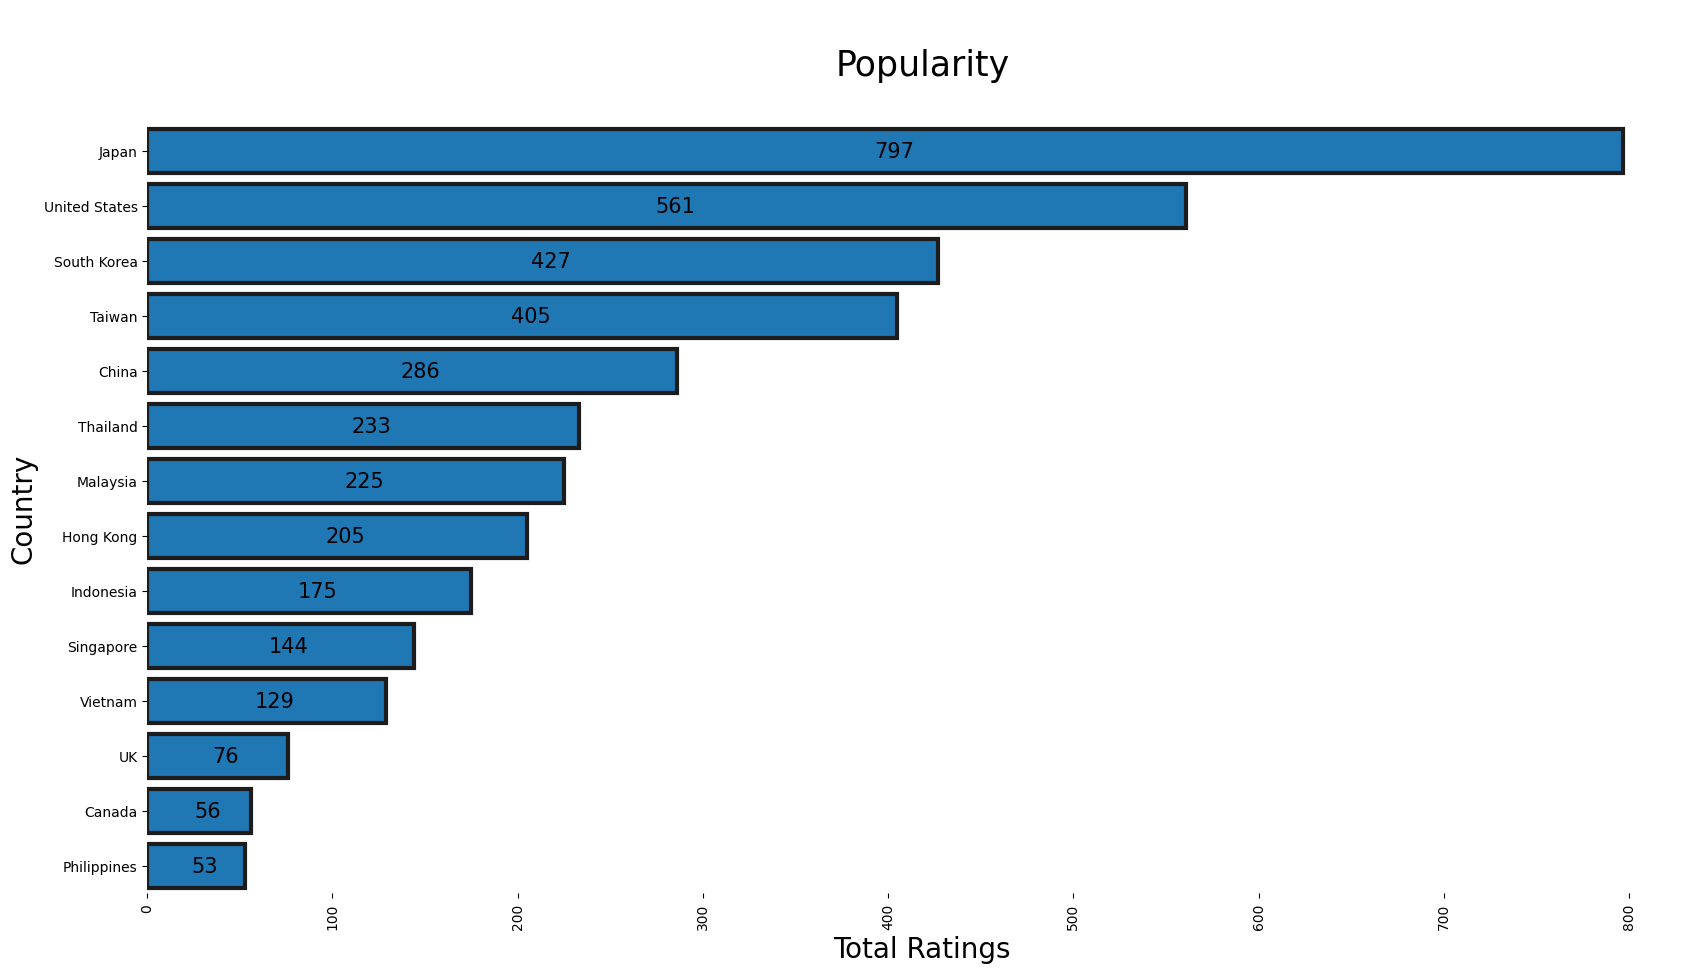

In [18]:
plt.subplots(figsize=(20, 10))
p=sns.countplot(ramen_df["Country"],order=ramen_df["Country"].value_counts().index[:14], saturation=1, edgecolor = "#1c1c1c", linewidth = 3)
p.axes.set_title("\nPopularity\n",fontsize=25)
p.axes.set_xlabel("Total Ratings",fontsize=20)
p.axes.set_ylabel("Country",fontsize=20)
p.axes.set_xticklabels(p.get_xticklabels(),rotation = 90)
for container in p.containers:
    p.bar_label(container,label_type="center",padding=6,size=15,color="black",rotation=0)


sns.despine(left=True, bottom=True)
plt.show()

Japan is the most popular origin with 797 entries. Then followed by United States, South Korea, Taiwan and China.

### Ramen Categories

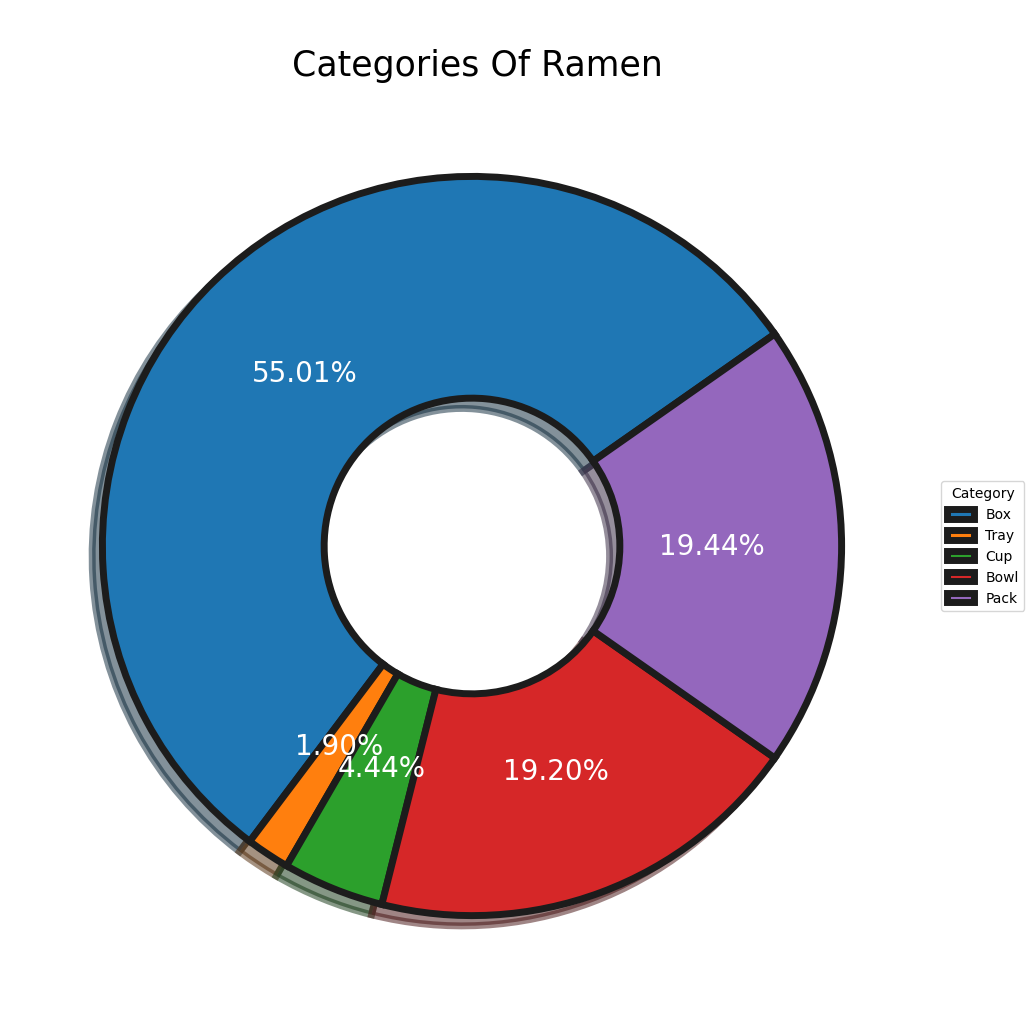

In [19]:
plt.subplots(figsize=(12, 12))

labels = "Box","Tray","Cup","Bowl","Pack"
size = 0.6

wedges, texts, autotexts = plt.pie([len(ramen_df[ramen_df["Style"] == "Pack"]["Style"]),
                                    len(ramen_df[ramen_df["Style"] == "Box"]["Style"]),
                                    len(ramen_df[ramen_df["Style"] == "Tray"]["Style"]),
                                    len(ramen_df[ramen_df["Style"] == "Cup"]["Style"]),
                                    len(ramen_df[ramen_df["Style"] == "Bowl"]["Style"])],
                                    explode = (0,0,0,0,0),
                                    textprops=dict(size= 20, color= "white"),
                                    autopct="%.2f%%",
                                    pctdistance = 0.65,
                                    radius=1,
                                    shadow = True,
                                    wedgeprops=dict(width = size, edgecolor = "#1c1c1c", linewidth = 5),
                                    startangle = 35)

plt.legend(wedges, labels, title="Category",loc="center left",bbox_to_anchor=(1, 0, 0.5, 1))
plt.title("\n Categories Of Ramen",fontsize=25)
plt.show()


Box is the top popular category followed by Pack and Bowl.

### Ratings Distribution

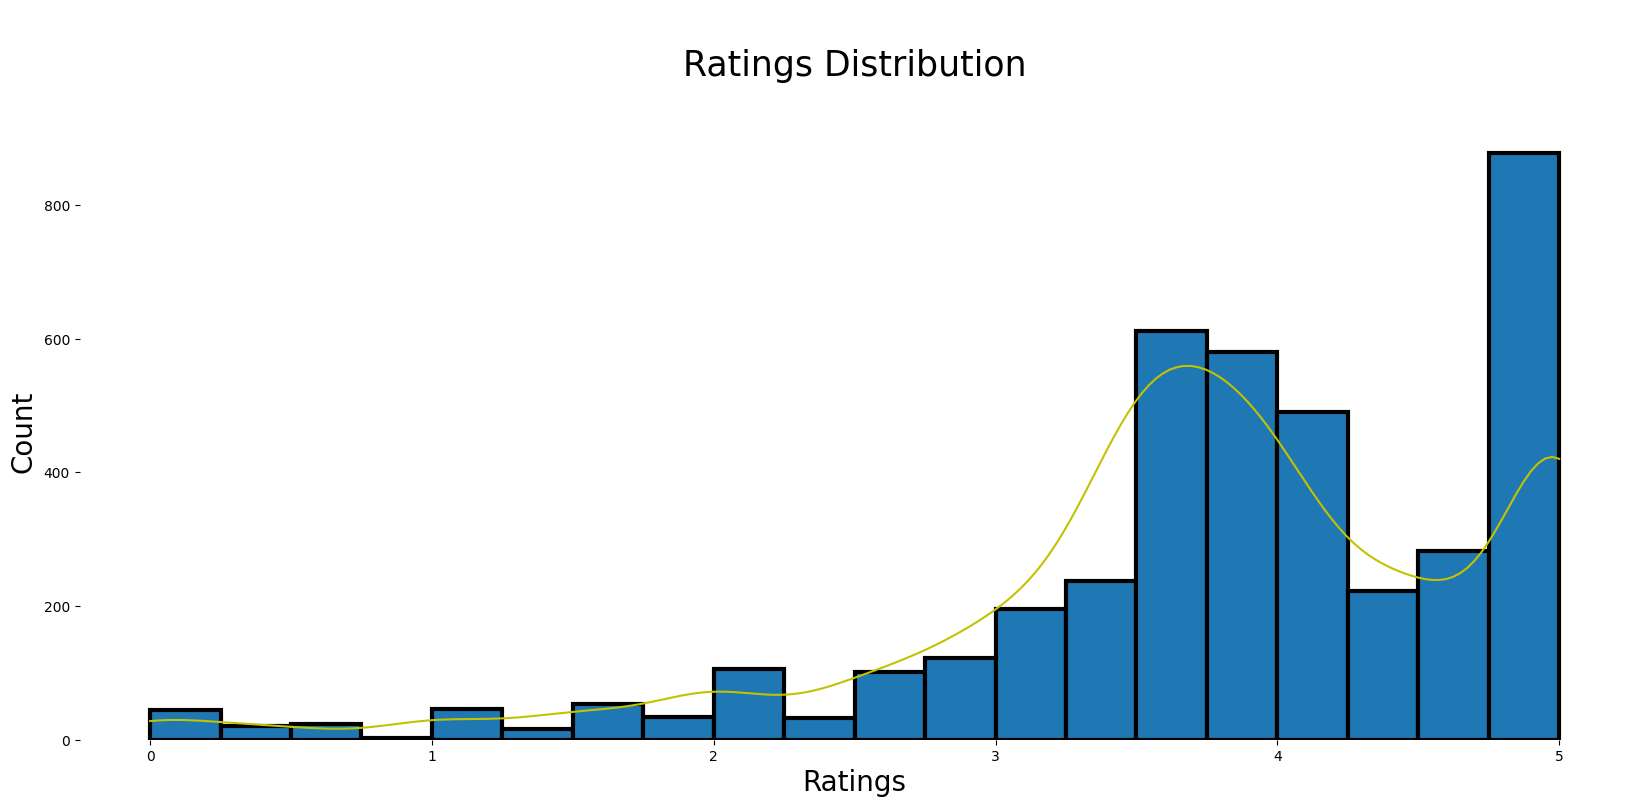

In [20]:
plt.subplots(figsize=(20, 8))
p = sns.histplot(ramen_df["Stars"],kde=True,bins=20,alpha=1,fill=True, linewidth = 3)
p.axes.lines[0].set_color("#C2C300")
p.axes.set_title("\nRatings Distribution\n",fontsize=25)
p.axes.set_xlabel("Ratings",fontsize=20)
p.axes.set_ylabel("Count",fontsize=20)

sns.despine(left=True, bottom=True)
plt.show()

Most ramen ratings are distributed between 3.5 and 5.0.

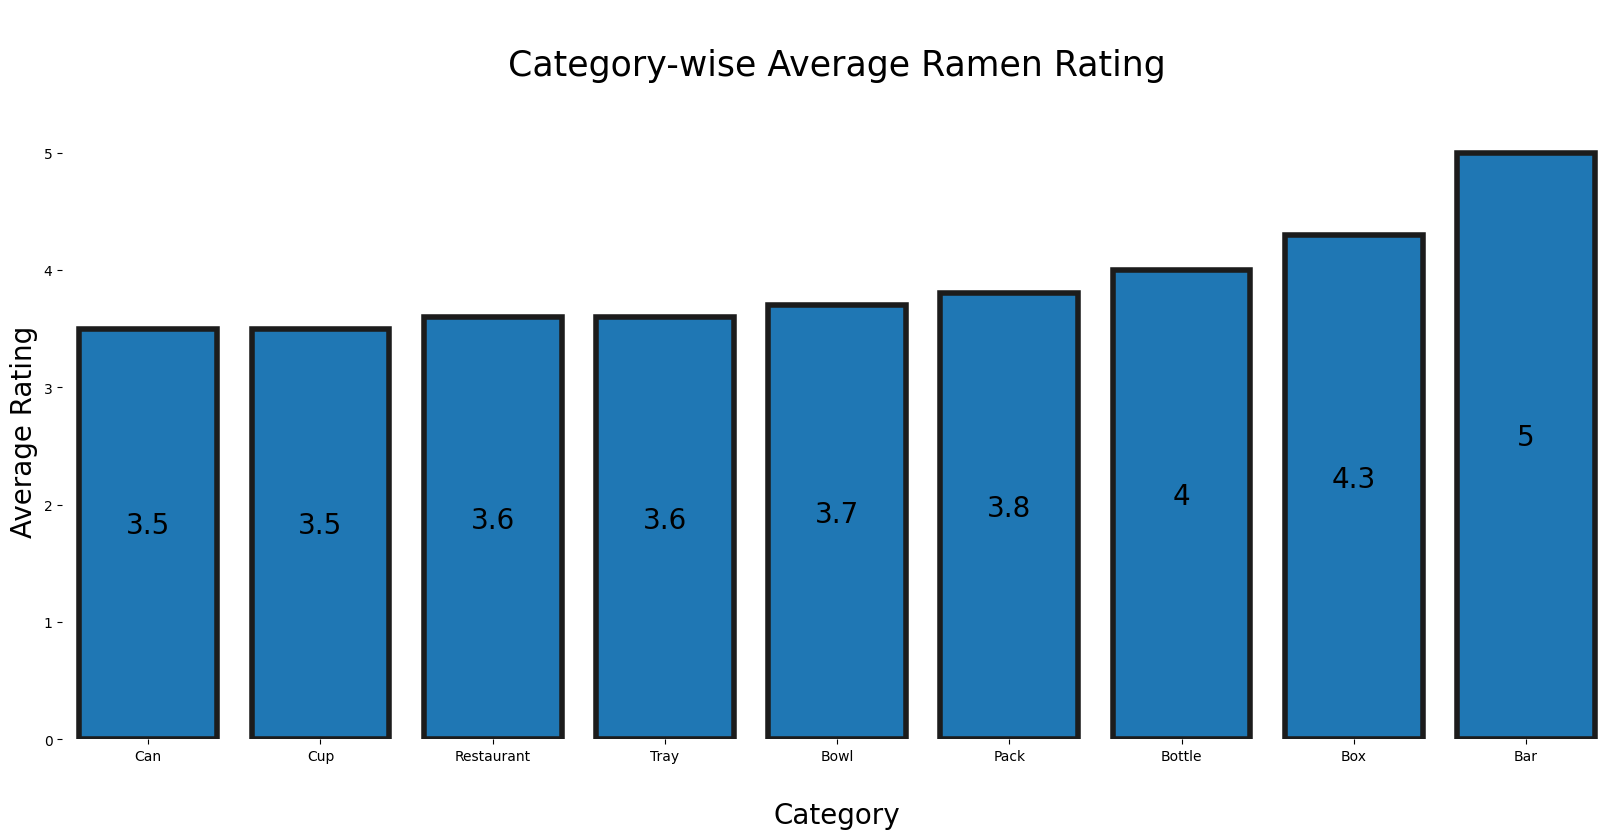

In [21]:
average_star_style_temp = ramen_df.groupby(["Style"]).mean().round(1).reset_index()
average_star_style = average_star_style_temp[["Style","Stars"]]

plt.subplots(figsize=(20, 8))
p = sns.barplot(x=average_star_style["Style"],y=average_star_style["Stars"],order=average_star_style.sort_values("Stars")["Style"], saturation=1,edgecolor = "#1c1c1c", linewidth = 4)
p.axes.set_title("\nCategory-wise Average Ramen Rating\n",fontsize=25)
p.axes.set_xlabel("\nCategory",fontsize=20)
p.axes.set_ylabel("Average Rating",fontsize=20)
p.axes.set_xticklabels(p.get_xticklabels(),rotation = 0)
for container in p.containers:
    p.bar_label(container,label_type="center",padding=6,size=20,color="black",rotation=0)

sns.despine(left=True, bottom=True)
plt.show()

Bar has the highest average rating of 5.0 while Can and Cup have the lowest average rating of 3.5

### Correlation Heatmap

In [22]:
Columns = ["Style"]
dataset = pd.get_dummies(ramen_df, columns = Columns, drop_first=True)
dataset.drop(columns=["Brand","Variety","Review","Country"],inplace=True)
dataset.rename(columns={"Style_Bottle": "Bottle", "Style_Bowl": "Bowl","Style_Box": "Box", "Style_Can": "Can","Style_Cup": "Cup", "Style_Pack": "Pack","Style_Restaurant": "Restaurant", "Style_Tray": "Tray"},inplace = True)
dataset.head()

,Stars,Bottle,Bowl,Box,Can,Cup,Pack,Restaurant,Tray
0,3.00,0,0,0,0,0,1,0,0
1,4.50,0,1,0,0,0,0,0,0
2,3.00,0,1,0,0,0,0,0,0
3,4.50,0,0,0,0,0,1,0,0
4,2.75,0,0,0,0,0,1,0,0


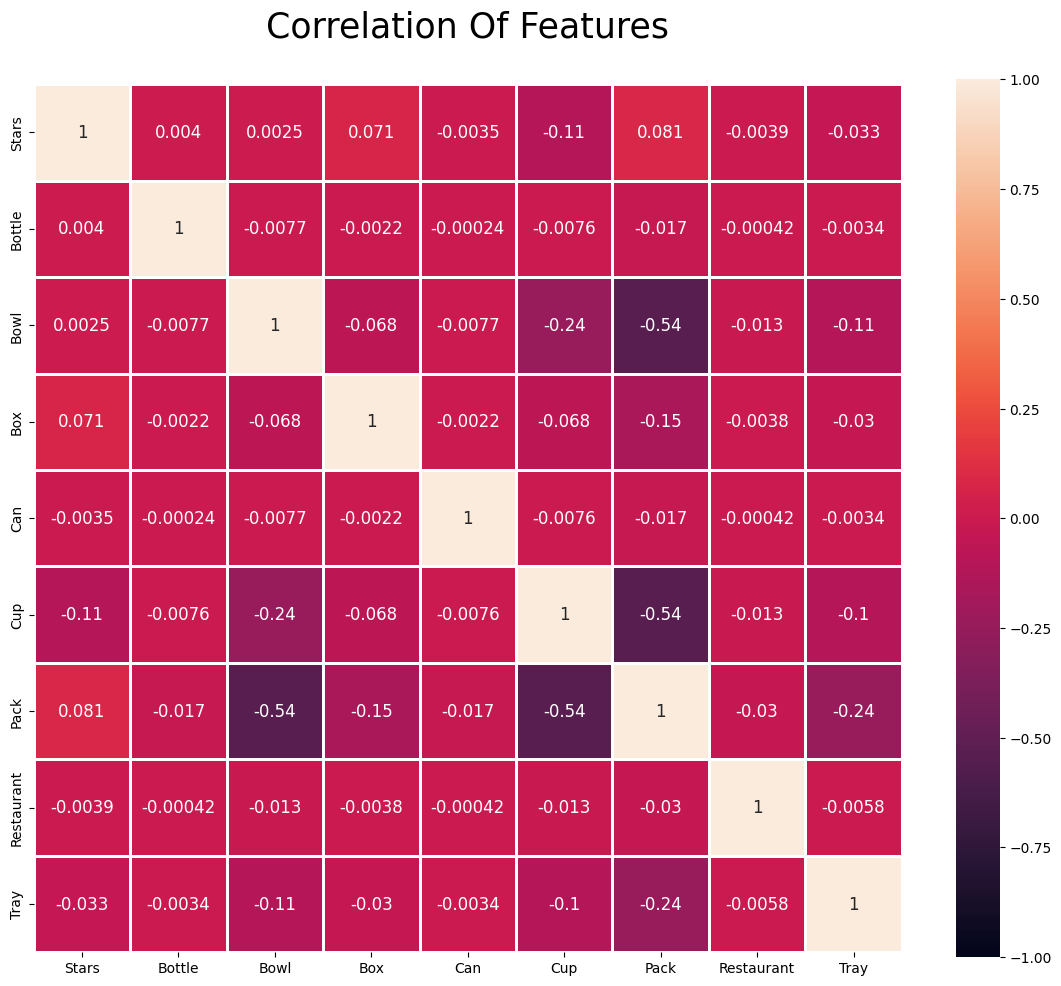

In [23]:
plt.subplots(figsize =(14, 12))

p=sns.heatmap(dataset.corr(), square=True, cbar_kws=dict(shrink =.95),
            annot=True, vmin=-1, vmax=1, linewidths=2,annot_kws=dict(fontsize =12))
p.axes.set_title("Correlation Of Features\n", fontsize=25)
plt.xticks(rotation=0)
plt.show()